In [980]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [981]:
df = pd.read_csv('Cities1.csv')
df2 = pd.read_csv('continents.csv - Página2.csv', decimal = ',')
df = df.merge(df2, on = 'Country')
df.isnull().sum()

City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
Continent           0
dtype: int64

In [982]:
continentes = df['Continent'].value_counts()
print(continentes)

Continent
Europe             1269
North America      1045
Asia                750
South America       249
Africa              224
Oceania             204
Middle East         173
Central America      49
Name: count, dtype: int64


In [983]:
df = df.dropna()
df.dtypes

City               object
Region             object
Country            object
AirQuality        float64
WaterPollution    float64
Continent          object
dtype: object

In [984]:
df = pd.get_dummies(df, columns=['Continent'])
df = df.drop(['Country', 'Region', 'City'], axis=1)

In [985]:
df.columns

Index(['AirQuality', 'WaterPollution', 'Continent_Africa', 'Continent_Asia',
       'Continent_Central America', 'Continent_Europe',
       'Continent_Middle East', 'Continent_North America', 'Continent_Oceania',
       'Continent_South America'],
      dtype='object')

In [986]:
df = df.astype(float)

In [987]:
X = df[['AirQuality', 'Continent_Africa', 'Continent_Asia',
       'Continent_Central America', 'Continent_Europe',
       'Continent_Middle East', 'Continent_North America', 'Continent_Oceania',
       'Continent_South America']]
Y = df['WaterPollution']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_poly_train, Y_train)

X_poly_test = poly_features.transform(X_test)
linear_pred = linear_model.predict(X_test)
poly_pred = model_poly.predict(X_poly_test)

print('Regressão Linear')
print('Score de treino:', linear_model.score(X_train, Y_train))
print('Score de teste:', linear_model.score(X_test, Y_test))
print('Regressão Polinomial')
print('Score de treino:', model_poly.score(X_poly_train, Y_train))
print('Score de teste:', model_poly.score(X_poly_test, Y_test))

Regressão Linear
Score de treino: 0.2354961492782962
Score de teste: 0.20915709526846826
Regressão Polinomial
Score de treino: 0.2604078497139466
Score de teste: 0.2361445760650095


<Axes: >

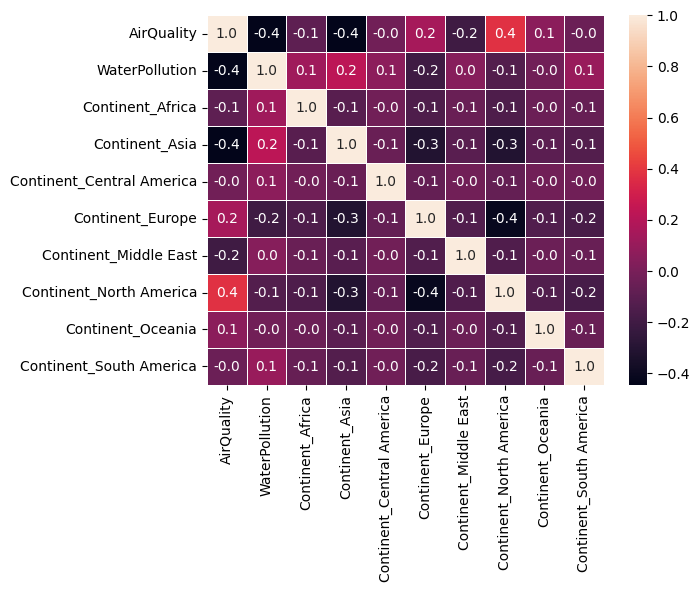

In [988]:
correlacao = df.corr()
sns.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

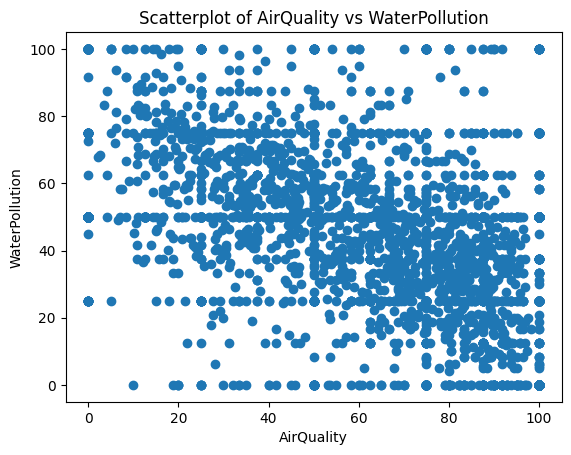

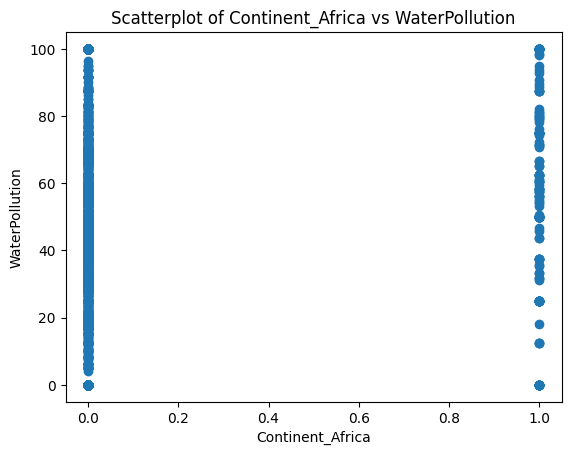

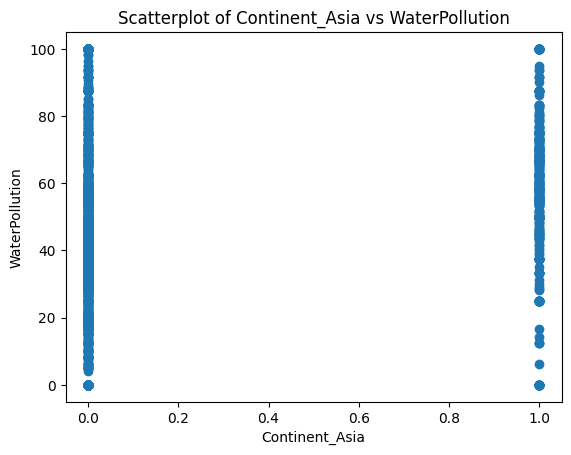

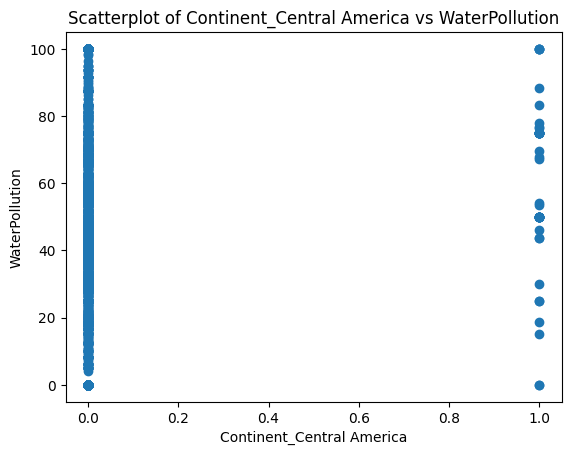

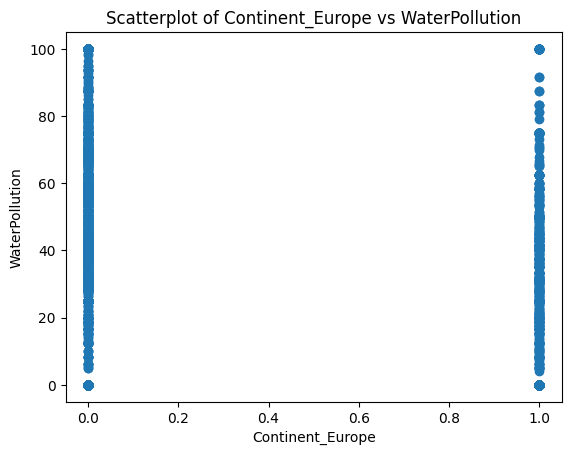

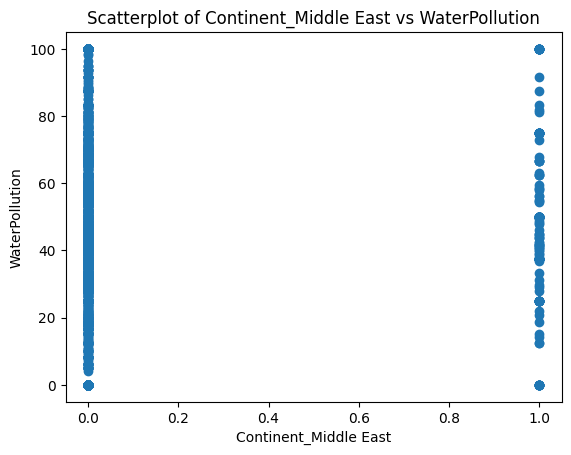

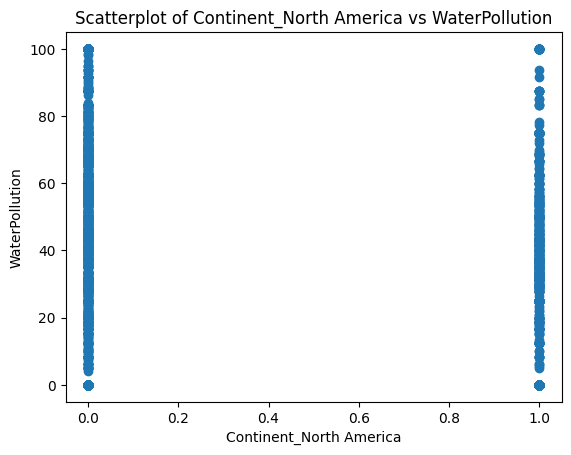

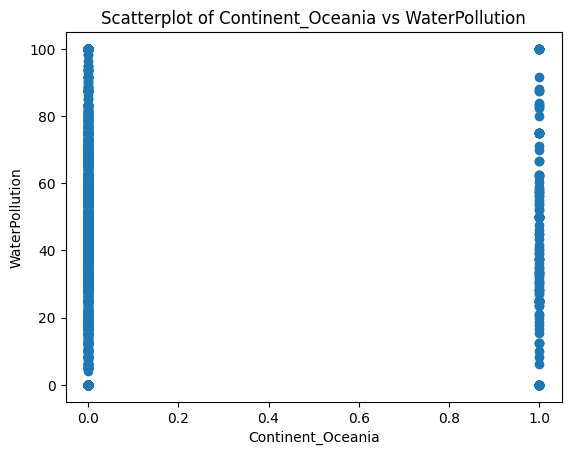

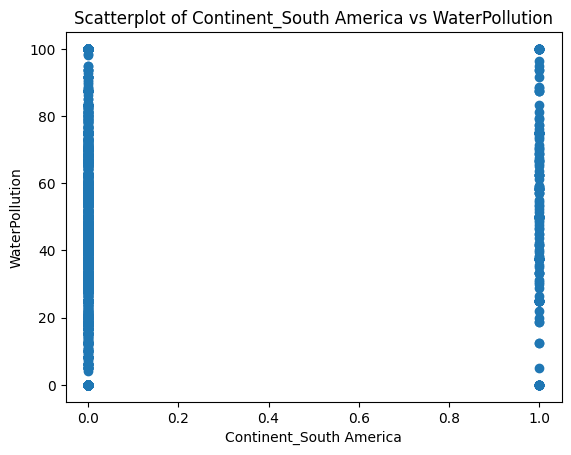

In [989]:
for column in X.columns:
    plt.figure()
    plt.scatter(df[column], Y)
    plt.title(f'Scatterplot of {column} vs WaterPollution')
    plt.xlabel(column)
    plt.ylabel('WaterPollution')

In [990]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         WaterPollution   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     133.0
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.48e-195
Time:                        17:36:36   Log-Likelihood:                -16031.
No. Observations:                3538   AIC:                         3.208e+04
Df Residuals:                    3529   BIC:                         3.213e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [991]:
# Com um nível de significância de 10%, os regressores significativos são: 'const', 'AirQuality', e os continentes África, Ásia, América Central, América do Norte, Oceania e América do Sul.

#Se um coeficiente não é estatisticamente significativo, significa que a variável correspondente não tem um efeito relevante na variável dependente no nível de confiança escolhido. Logo, podemos cortar essas variáveis do modelo.

#O teste F verifica se todos os coeficientes de regressão são zero, mas sem o p_valor, não podemos concluir se a hipótese nula é rejeitada ou aceita com 10% de significância